In [1]:
import ipywidgets as widgets


class Seed:  # I know this looks dumb. not my fault
    random_seed = 1
    
print("Random Seed")
seed_input = widgets.IntText(
    value=Seed.random_seed,
    step=1,
    description='',
    disabled=False
)

output = widgets.Output()
display(seed_input, output)

def on_value_change(change):
    with output:
        Seed.random_seed = change['new']

seed_input.observe(on_value_change, names='value')

Random Seed


IntText(value=1)

Output()

In [2]:
import pandas as pd

from model import processing
# Experiments
from model import run
from model.plot_utils import *
from model.amm.amm import Asset, WorldState
from model.amm.omnipool_amm import OmnipoolAgent, OmniPool, OmnipoolTradeStrategies
import random

assets = [
    Asset(name='LRNA', price=0.4),
    Asset(name='HDX', price=0.08),
    Asset(name='USD', price=1),
    Asset(name='ETH', price=3000),
    Asset(name='DOGE', price=0.001)
]
omnipool = (
    OmniPool(
        tvl_cap_usd=10000000,
        lrna_fee=0.001,
        asset_fee=0.001,
        preferred_stablecoin='USD'
    ).initializeAssetList(assets)
    .add_lrna_pool('HDX', 1000000)
    .add_lrna_pool('USD', 100000)
    .add_lrna_pool('ETH', 10000)
    .add_lrna_pool('DOGE', 10000000)
)
agents = {
    "trader": OmnipoolAgent(
        name='trader',
        trade_strategy=OmnipoolTradeStrategies.random_swaps(amount = 100)
    )
    .add_position('DOGE', 100000)
    .add_position('ETH', 100)
}

worldState = WorldState(
    exchange=omnipool,
    agents=agents
)

timesteps = 5000
state = {'WorldState': worldState}
config_dict = {
    'N': 1,  # number of monte carlo runs
    'T': range(timesteps),  # number of timesteps - 147439 is the length of uniswap_events
    'M': {'timesteps': [timesteps]},  # simulation parameters
}

pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.float_format = '{:.2f}'.format

run.config(config_dict, state)
events = run.run()

rdf, agent_df = processing.postprocessing(events)

# print(agent_df.tail(20))


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (5000, 1, 1, 1)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 2.03s


[0]


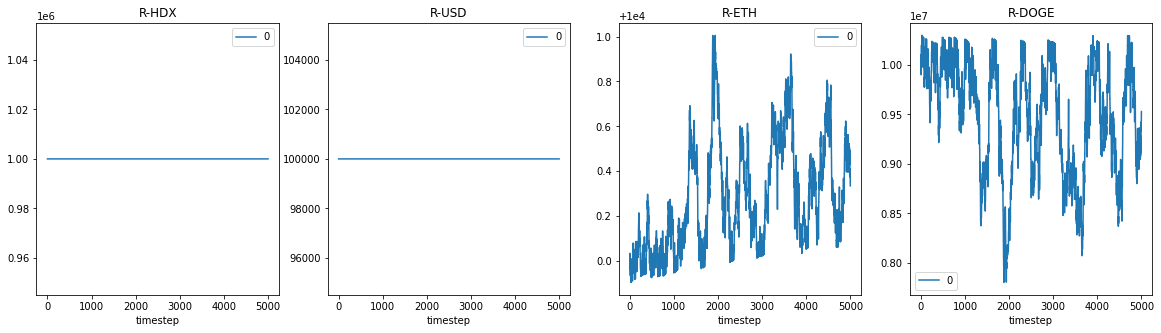

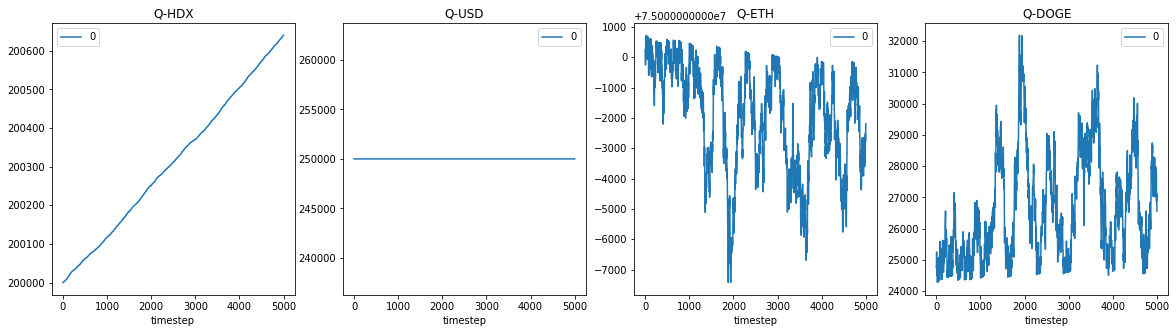

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

In [3]:

var_list = ['R', 'Q', 'A', 'D']
plot_vars(rdf, var_list)